Dataset from https://www.kaggle.com/competitions/dogs-vs-cats

In [1]:
# ! wget https://drive.usercontent.google.com/download?id=18PsGch7egeczC4zLjYw3dXGjHyL-Kebw

Dataset prepare instructions:

In [2]:
# import os

# os.mkdir('dataset_cats_dogs' )

# os.mkdir('dataset_cats_dogs/train')
# os.mkdir('dataset_cats_dogs/val')
# os.mkdir('dataset_cats_dogs/test')

# os.mkdir('dataset_cats_dogs/train/cats')
# os.mkdir('dataset_cats_dogs/train/dogs')

# os.mkdir('dataset_cats_dogs/val/cats')
# os.mkdir('dataset_cats_dogs/val/dogs')

# os.mkdir('dataset_cats_dogs/test/cats')
# os.mkdir('dataset_cats_dogs/test/dogs')

# cats_files = os.listdir('dataset_cats_dogs_orig/cats')
# dogs_files = os.listdir('dataset_cats_dogs_orig/dogs')

# # select random 2000 files and split into 1000, 500, 500
# import random
# random.seed(42)

# random.shuffle(cats_files)
# random.shuffle(dogs_files)

# train_cats = cats_files[:1000]
# val_cats = cats_files[1000:1500]
# test_cats = cats_files[1500:2000]

# train_dogs = dogs_files[:1000]
# val_dogs = dogs_files[1000:1500]
# test_dogs = dogs_files[1500:2000]

# import shutil

# for f in train_cats:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/cats', f), os.path.join('dataset_cats_dogs/train/cats', f))

# for f in val_cats:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/cats', f), os.path.join('dataset_cats_dogs/val/cats', f))

# for f in test_cats:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/cats', f), os.path.join('dataset_cats_dogs/test/cats', f))

# for f in train_dogs:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/dogs', f), os.path.join('dataset_cats_dogs/train/dogs', f))

# for f in val_dogs:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/dogs', f), os.path.join('dataset_cats_dogs/val/dogs', f))

# for f in test_dogs:
#     shutil.copy(os.path.join('dataset_cats_dogs_orig/dogs', f), os.path.join('dataset_cats_dogs/test/dogs', f))

# print('Done!')


In [3]:
from keras import models, layers
import numpy as np

In [4]:
from keras.preprocessing import  image_dataset_from_directory
 
train_dataset = image_dataset_from_directory(
    "dataset_cats_dogs/train",
    labels="inferred", 
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150),
    shuffle=True,
)

val_dataset = image_dataset_from_directory(
    "dataset_cats_dogs/val",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150),
    shuffle=True,
)

test_dataset = image_dataset_from_directory(
    "dataset_cats_dogs/test",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150),
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [5]:
data_augmentation = models.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
 
    ]
)

In [6]:
network = models.Sequential()
network.add(layers.InputLayer(shape=(150, 150, 3)))

network.add(data_augmentation)

network.add(layers.Rescaling(1./255))
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.optimizers import RMSprop

network.compile(optimizer=RMSprop(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
result = network.fit(train_dataset, epochs=50, validation_data=val_dataset)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 196ms/step - accuracy: 0.5130 - loss: 0.6950 - val_accuracy: 0.5020 - val_loss: 0.6892
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.5375 - loss: 0.6902 - val_accuracy: 0.5380 - val_loss: 0.6833
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.5580 - loss: 0.6816 - val_accuracy: 0.5530 - val_loss: 0.6752
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.5750 - loss: 0.6724 - val_accuracy: 0.6030 - val_loss: 0.6585
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.6100 - loss: 0.6572 - val_accuracy: 0.6170 - val_loss: 0.6528
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.6105 - loss: 0.6571 - val_accuracy: 0.6200 - val_loss: 0.6475
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.6375 - loss: 0.6451 - val_accuracy: 0.6340 - val_loss: 0.6423
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.6380 - loss: 0

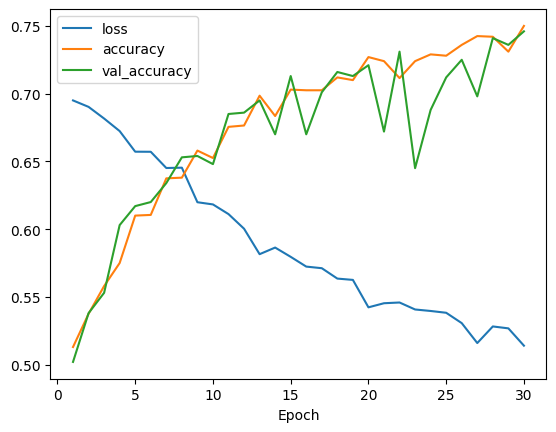

In [9]:
from matplotlib import pyplot as plt

# plot training history
plt.plot(range(1, 31), result.history['loss'], label='loss')
plt.plot(range(1, 31), result.history['accuracy'], label='accuracy')
plt.plot(range(1, 31), result.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

In [10]:
test_loss, test_acc = network.evaluate(test_dataset)
 
print('test_acc:', test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7350 - loss: 0.5145
test_acc: 0.7350000143051147


In [11]:
img, label = test_dataset.as_numpy_iterator().next()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


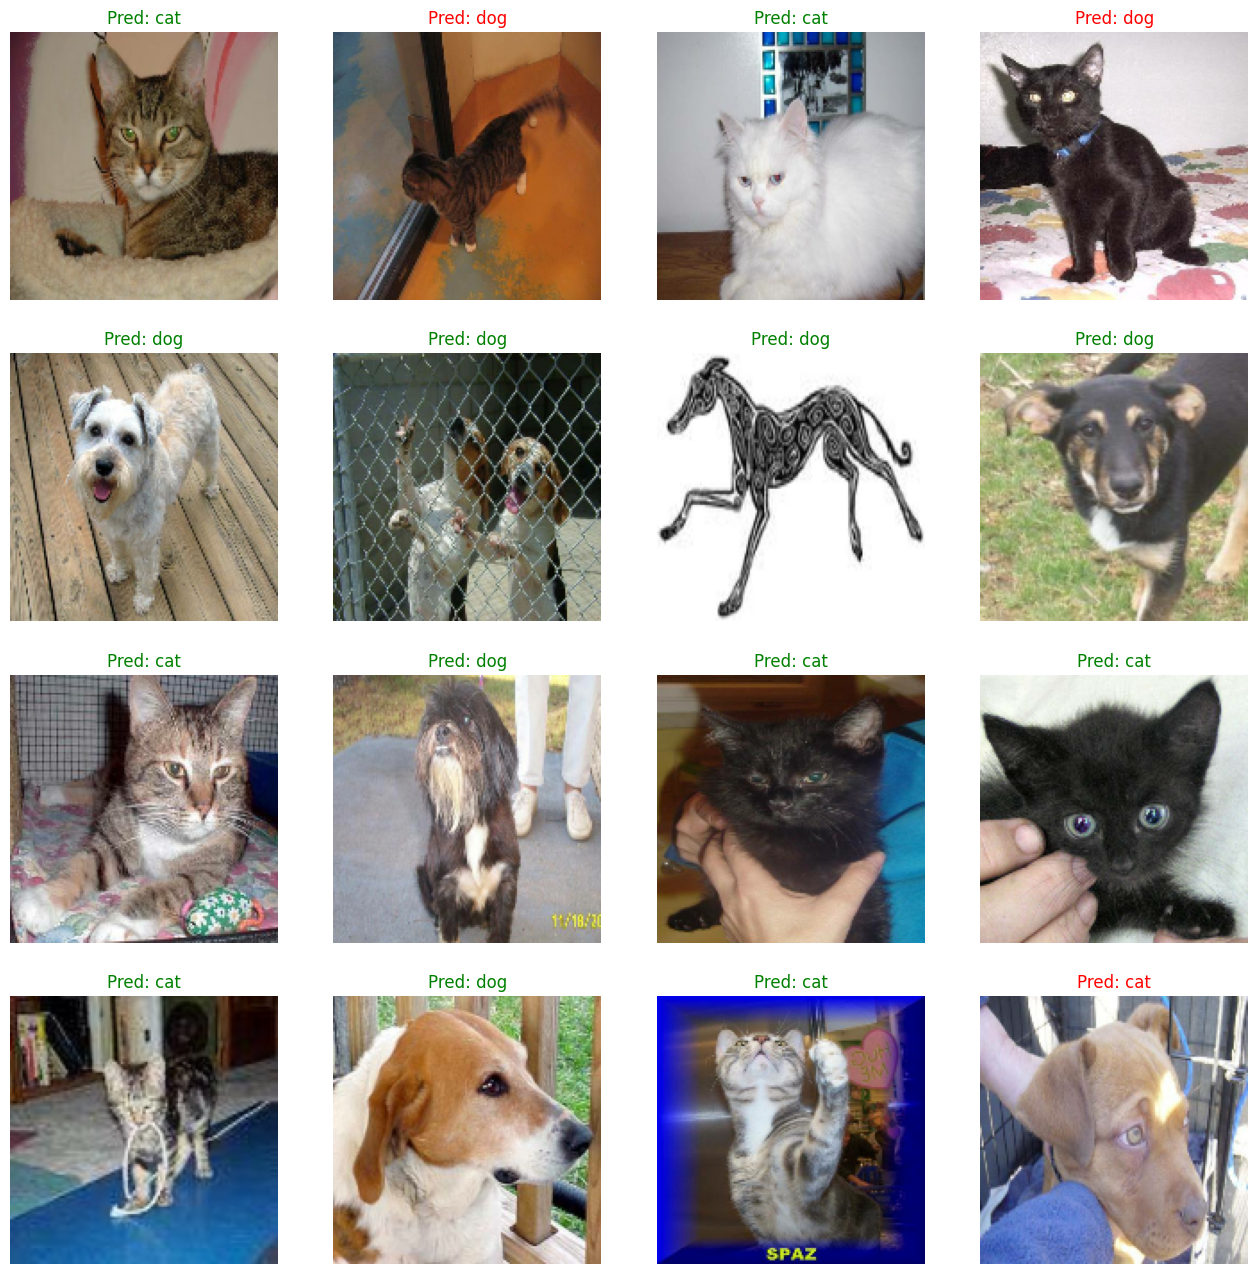

In [12]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

imgs, labels = test_dataset.as_numpy_iterator().next()


for i in range(4):
    for j in range(4):
        pred = network.predict(imgs[i * 4 + j].reshape(1, 150, 150, 3))

        axs[i, j].imshow(imgs[i * 4 + j]/255.0, cmap='gray')
        axs[i, j].set_title(f"Pred: {'dog' if pred[0]>0.5 else 'cat'}", color=('green' if (pred[0]>0.5)==labels[i * 4 + j] else 'red'))
        axs[i, j].axis('off')